# 1 Modelling the external data
## Case a) Mixed reflectance and thermal emission, constrained EV

**Author:** Hannu Parviainen<br>
**Last edited:** 21.11.2021

Here we model the KELT-1 light curves observed with TESS (Beatty20, XX20), LBT (Beatty), and Spitzer (Beatty2019, Beatty2017) using a full phase curve model that includes the transit, secondary eclipse, thermal emission, reflection, ellipsoidal variations and Doppler boosting. 

The model is implemented by `src.priordatalpf.JointLPF`, which inherits all its functionality from `pytransit.lpf.PhaseCurveLPF`.

In this base case we don't constrain the geometric albedo or the planet's day-side flux ratio (we do this in the later cases). These two parameters should be linearly correlated since they are the main parameters affecting the eclipse depth, but it is useful to see their joint posterior.

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from multiprocessing import Pool
from numba import set_num_threads, config

config.THREADING_LAYER = 'safe'
set_num_threads(1)

In [3]:
from corner import corner
from src import ExternalDataLPF, read_mcmc
from src.externaldatalpf import plot_joint_lcs

In [4]:
lpf = ExternalDataLPF('a')

In [5]:
lpf.ps

[  0 |G| tc             N(μ = 2455914.1628, σ = 0.01)            [    -inf ..      inf],
   1 |G| p              N(μ = 1.217513, σ = 4.5e-05)             [    0.00 ..      inf],
   2 |G| rho            N(μ = 0.5392592032228568, σ = 0.07529312598667542) [    0.00 ..      inf],
   3 |G| b              U(a = 0.0, b = 1.0)                      [    0.00 ..     1.00],
   4 |G| secw           N(μ = 0.0, σ = 1e-06)                    [   -1.00 ..     1.00],
   5 |G| sesw           N(μ = 0.0, σ = 1e-06)                    [   -1.00 ..     1.00],
   6 |P| k2             N(μ = 0.078, σ = 0.005)                  [    0.00 ..      inf],
   7 |G| oev            N(μ = 0.0, σ = 0.09)                     [    -inf ..      inf],
   8 |G| aev_TESS       N(μ = 0.000443, σ = 2.8e-05)             [    0.00 ..      inf],
   9 |G| adb_TESS       N(μ = 4.1e-05, σ = 4.2e-06)              [    0.00 ..      inf],
  10 |G| log10_ted_TESS U(a = -3.0, b = 0.0)                     [    -inf ..      inf],
  11 |G| lo

In [6]:
def lnposterior(pv):
    return lpf.lnposterior(pv)

pool = Pool(processes=16)

Process ForkPoolWorker-4:
Process ForkPoolWorker-12:
Process ForkPoolWorker-15:
Process ForkPoolWorker-10:
Process ForkPoolWorker-14:
Process ForkPoolWorker-8:
Process ForkPoolWorker-3:
Process ForkPoolWorker-6:
Process ForkPoolWorker-13:
Process ForkPoolWorker-7:
Process ForkPoolWorker-16:
Process ForkPoolWorker-5:
Process ForkPoolWorker-1:
Traceback (most recent call last):
Process ForkPoolWorker-9:
Traceback (most recent call last):
Process ForkPoolWorker-11:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/hannu/soft/anaconda/envs/astro/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/hannu/soft/anaconda/envs/astro/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
Process ForkPoolWorker-2:
Traceback (most recent call last):
  File "

  File "/home/hannu/soft/anaconda/envs/astro/lib/python3.9/multiprocessing/queues.py", line 365, in get
    with self._rlock:
  File "/home/hannu/soft/anaconda/envs/astro/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/hannu/soft/anaconda/envs/astro/lib/python3.9/multiprocessing/queues.py", line 365, in get
    with self._rlock:
  File "/home/hannu/soft/anaconda/envs/astro/lib/python3.9/multiprocessing/queues.py", line 365, in get
    with self._rlock:
  File "/home/hannu/soft/anaconda/envs/astro/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/home/hannu/soft/anaconda/envs/astro/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/hannu/soft/anaconda/envs/astro/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/hannu/soft/anaconda/envs/astro/lib/python3.9

In [ ]:
lpf.optimize_global(450, 200, pool=pool, lnpost=lnposterior, vectorize=False)

Global optimisation:   0%|          | 0/450 [00:00<?, ?it/s]

In [ ]:
lpf.optimize_global(45000, 300, pool=pool, lnpost=lnposterior, vectorize=False)

Global optimisation:   0%|          | 0/45000 [00:00<?, ?it/s]

In [ ]:
#how_to_start = 'start_from_scratch'
how_to_start = 'continue'

if how_to_start is 'start_from_scratch':
    lpf.optimize_global(45000, 300, pool=pool, lnpost=lnposterior, vectorize=False)
    lpf.sample_mcmc(50, thin=10, repeats=1, save=False, pool=pool, lnpost=lnposterior, vectorize=False)
    
elif how_to_start is 'continue':
    lpf.optimize_global(1, 300, pool=pool, lnpost=lnposterior, vectorize=False)
    df = read_mcmc(f'results/{lpf.name}.nc')
    sids = permutation(df.values.shape[0])[:lpf.de.n_pop]
    starting_population = df.values[sids, :-1].copy()
    lpf.sample_mcmc(50, thin=10, repeats=1, save=False, population=starting_population, 
                    pool=pool, lnpost=lnposterior, vectorize=False)
    
else:
    raise NotImplementedError

In [ ]:
plot_joint_lcs(lpf);

In [6]:
df = read_mcmc('results/01a_ext_emission_and theoretical_ev.nc')
sids = permutation(df.values.shape[0])[:lpf.de.n_pop]
starting_population = df.values[sids, :-1].copy()
lpf.sample_mcmc(500, thin=10, repeats=1, save=True, population=starting_population)

MCMC sampling:   0%|          | 0/1 [00:00<?, ?it/s]

Run 1/1:   0%|          | 0/500 [00:00<?, ?it/s]

In [7]:
lpf.sample_mcmc(5000, thin=50, repeats=8, save=True)

MCMC sampling:   0%|          | 0/8 [00:00<?, ?it/s]

Run 1/8:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 2/8:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 3/8:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 4/8:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 5/8:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 6/8:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 7/8:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 8/8:   0%|          | 0/5000 [00:00<?, ?it/s]

In [8]:
lpf.sample_mcmc(5000, thin=50, repeats=3, save=True)

MCMC sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Run 1/3:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 2/3:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 3/3:   0%|          | 0/5000 [00:00<?, ?it/s]

In [15]:
df = lpf.posterior_samples(derived_parameters=False)

In [16]:
df

,tc,p,rho,b,secw,sesw,k2,oev,aev_TESS,adb_TESS,...,lm_s__0_4,lm_s__0_5,lm_s__0_6,lm_i__0,lm_s__0_1,lm_s__0_2,lm_s__0_3,lm_s__0_4,lm_s__0_5,lm_s__0_6
0,2.455914e+06,1.217494,0.554860,0.360934,-2.885929e-07,-2.951063e-07,0.005859,-1.794128e-07,0.000464,0.000042,...,0.001726,-0.000872,0.000383,0.998108,-0.002315,-0.001275,0.000297,0.001114,-0.000779,0.000284
1,2.455914e+06,1.217494,0.551783,0.363862,-9.662236e-09,-2.915933e-07,0.005863,-2.239194e-07,0.000465,0.000043,...,0.001680,-0.000887,0.000348,0.998220,-0.001988,-0.001143,0.000431,0.001157,-0.000801,0.000327
2,2.455914e+06,1.217494,0.545849,0.371295,1.006536e-07,-5.261247e-07,0.005886,-2.053093e-07,0.000456,0.000043,...,0.001764,-0.000818,0.000388,0.998685,-0.001223,-0.000726,0.000401,0.001196,-0.000780,0.000344
3,2.455914e+06,1.217494,0.547078,0.368393,-2.296097e-07,-2.999280e-07,0.005880,-2.041153e-07,0.000456,0.000043,...,0.001698,-0.000852,0.000361,0.998708,-0.001065,-0.000652,0.000489,0.001185,-0.000785,0.000342
4,2.455914e+06,1.217494,0.550070,0.364074,-1.097335e-07,-3.230083e-07,0.005865,-2.234424e-07,0.000462,0.000042,...,0.001713,-0.000845,0.000367,0.998615,-0.001269,-0.000767,0.000448,0.001178,-0.000762,0.000334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2.455914e+06,1.217494,0.560106,0.351424,-1.334098e-06,-2.241923e-07,0.005943,-6.011855e-08,0.000437,0.000046,...,0.001799,-0.000761,0.000655,0.998968,0.000636,-0.000199,0.001107,0.001813,-0.000983,0.000646
29996,2.455914e+06,1.217494,0.560772,0.350293,-1.281106e-06,-2.537295e-07,0.005942,-5.902832e-08,0.000437,0.000046,...,0.001800,-0.000761,0.000654,0.998963,0.000626,-0.000200,0.001109,0.001809,-0.000981,0.000644
29997,2.455914e+06,1.217494,0.560772,0.350293,-1.281106e-06,-2.537295e-07,0.005942,-5.902832e-08,0.000437,0.000046,...,0.001800,-0.000761,0.000654,0.998963,0.000626,-0.000200,0.001109,0.001809,-0.000981,0.000644
29998,2.455914e+06,1.217494,0.567247,0.337538,-1.344156e-06,-3.717720e-07,0.005920,-4.991441e-08,0.000439,0.000045,...,0.001806,-0.000764,0.000634,0.998931,0.000489,-0.000281,0.001054,0.001818,-0.000957,0.000650


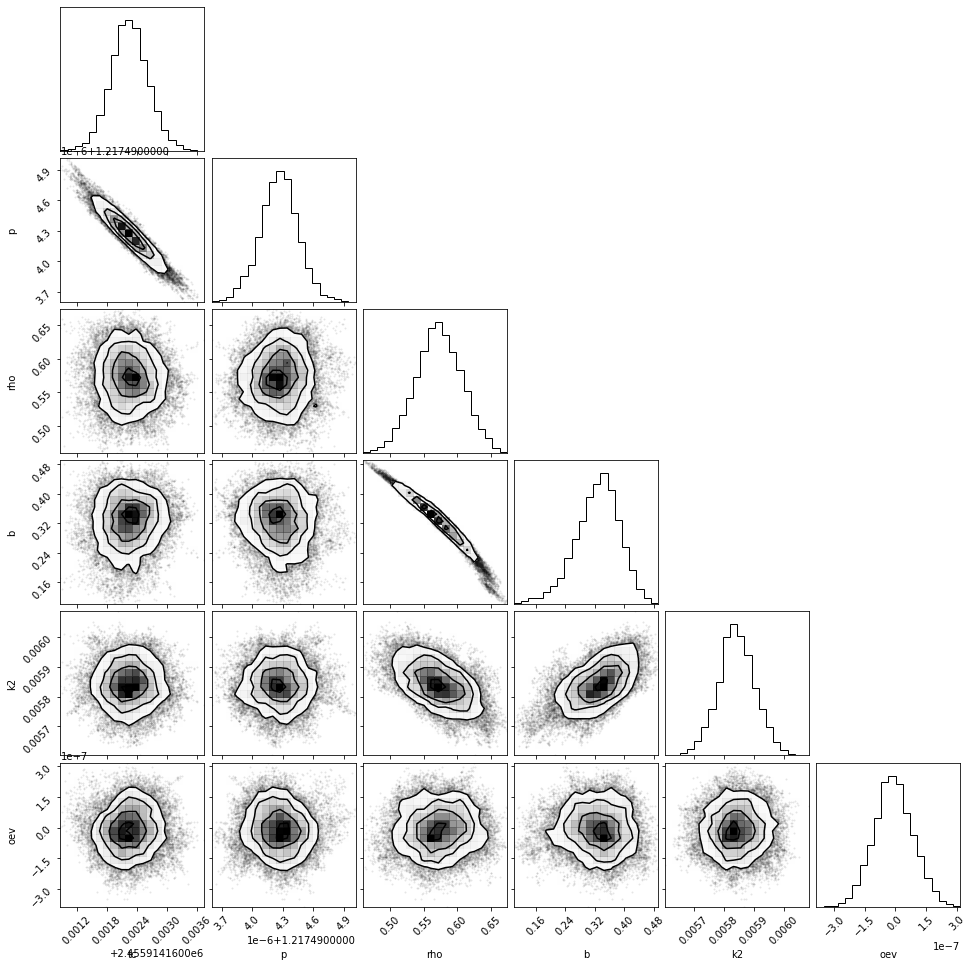

In [17]:
corner(df.iloc[:,[0,1,2,3,6,7]]);

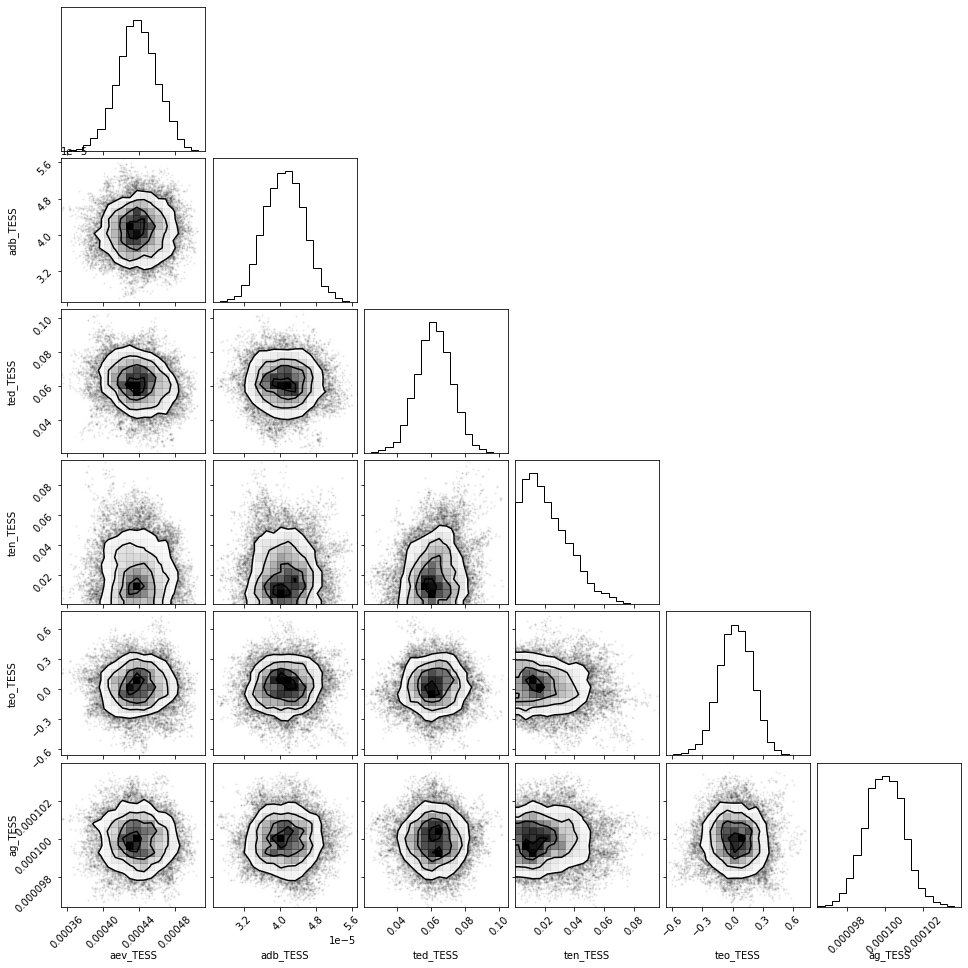

In [19]:
corner(df.iloc[:,8:14]);

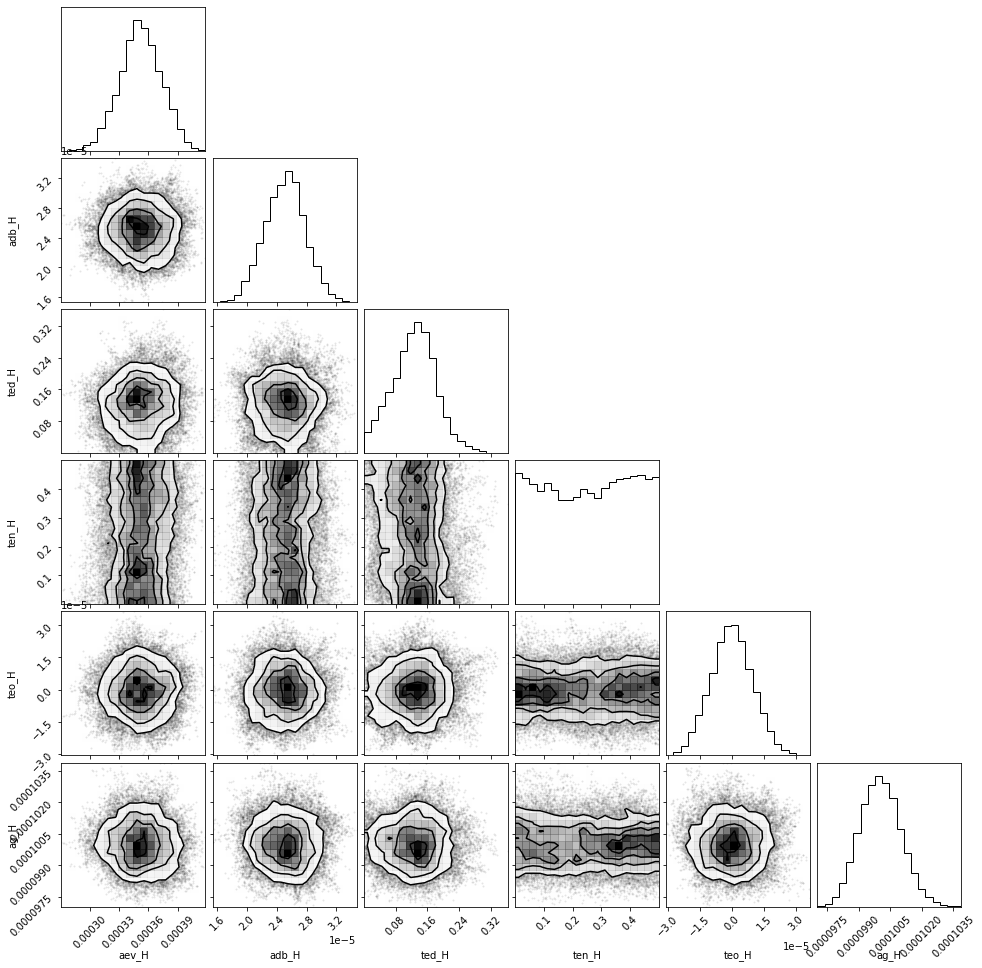

In [20]:
corner(df.iloc[:,14:20]);

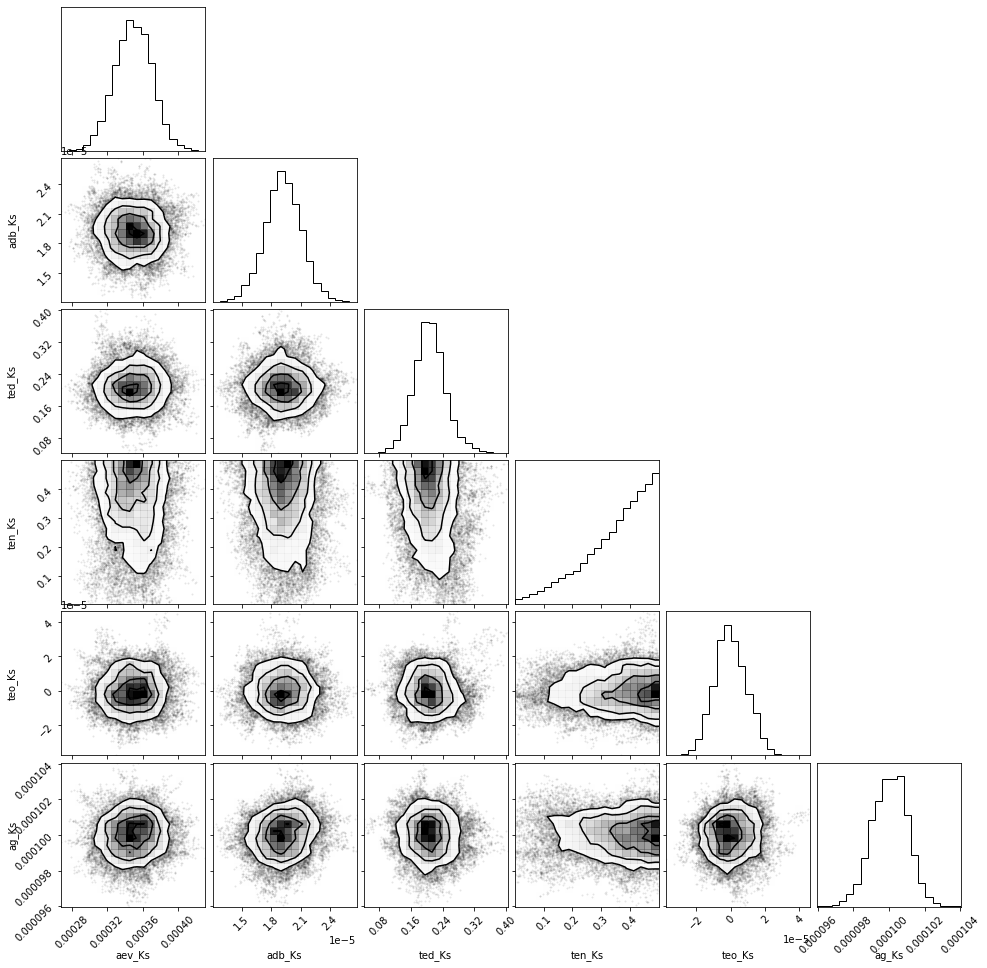

In [21]:
corner(df.iloc[:,20:26]);

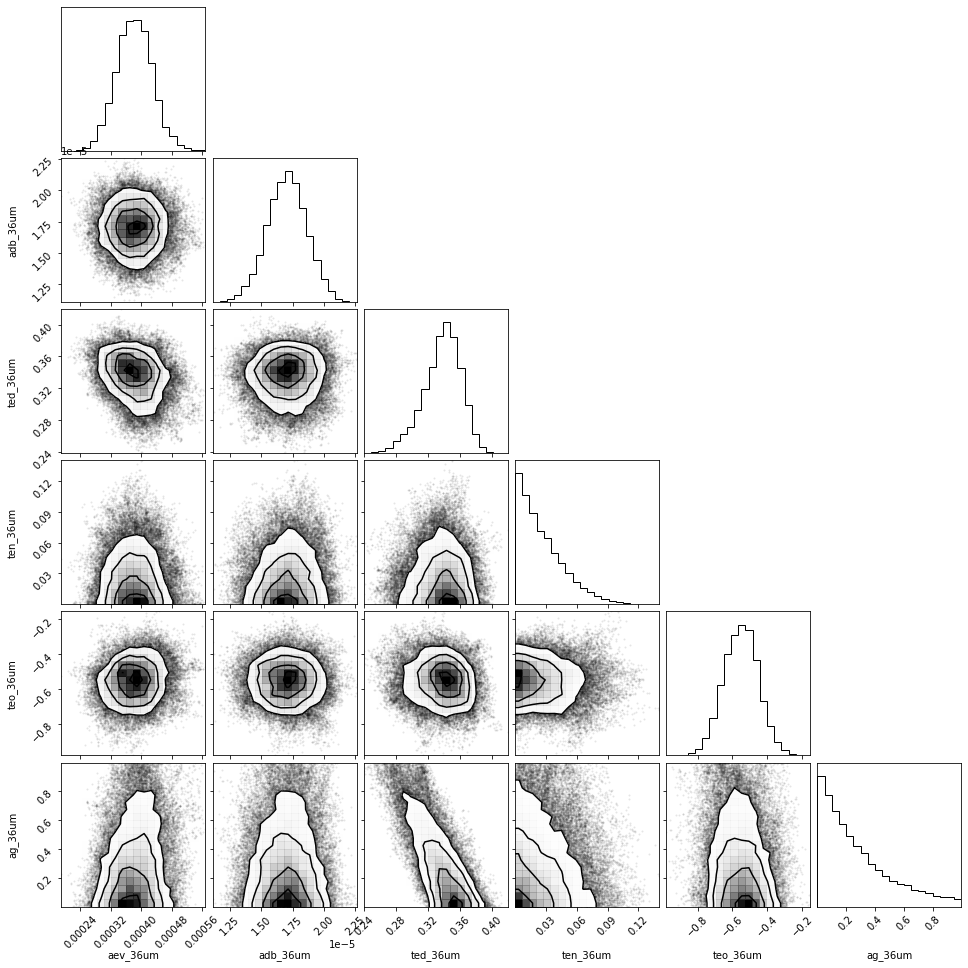

In [26]:
corner(df.iloc[:,26:32]);

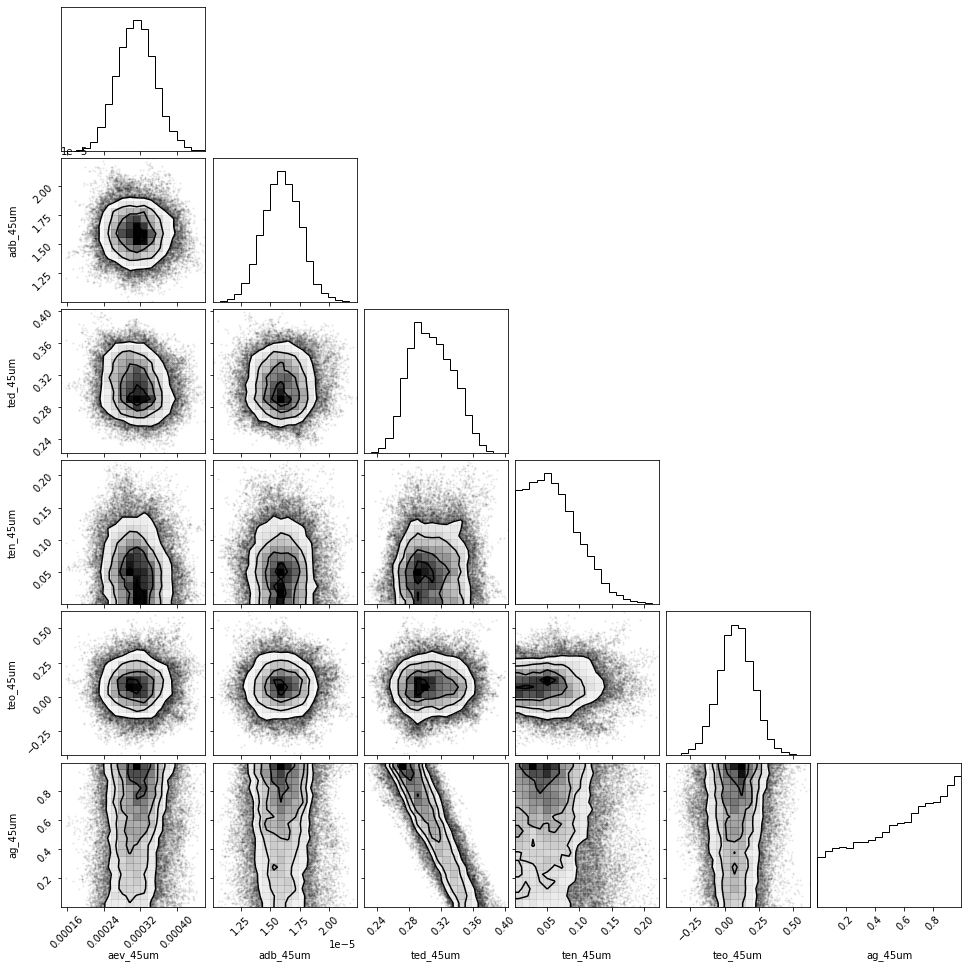

In [27]:
corner(df.iloc[:,32:38]);

---

<center>&copy 2021 Hannu Parviainen</center>